# Dubins' Path Examples

In [1]:
%matplotlib inline
import dubins
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
matplotlib.rcParams['figure.figsize'] = 12, 9

In [6]:
# Input Data
configurations = [
    (0.0, 0.0, 0.0),
    (0.0, 0.0, np.pi/4),
    (4.0, 4.0, np.pi/4),
    (4.0, 0.0, 0.0),
    (-4.0, 0.0, 0.0),
    (4.0, 4.0, 0.0),
    (4.0, -4.0, 0.0),
    (-4.0, 4.0, 0.0),
    (-4.0, -4.0, 0.0),
    (4.0, 4.0, np.pi),
    (4.0, -4.0, np.pi),
    (0.5, 0.0, np.pi),
]

configuration_pairs = [
    (0, 4),
    (0, 5),
    (0, 6),
    (0, 7),
    (0, 8),
    (0, 9),
    (0, 10),
    (0, 11),
    (1, 2),
    (2, 1)
]

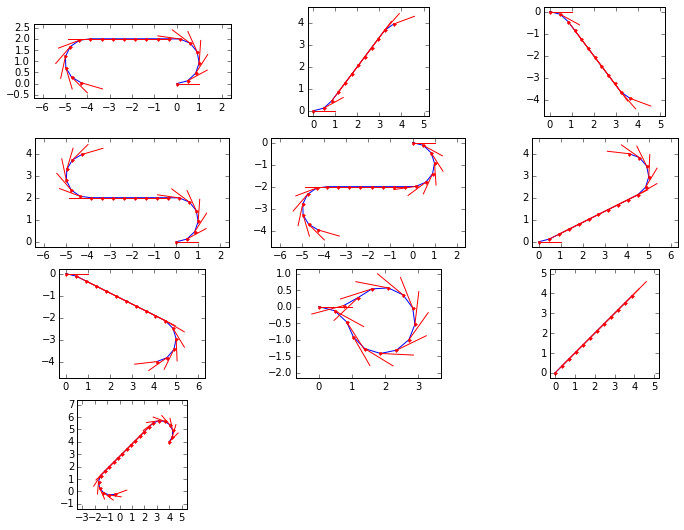

In [9]:
def expand_axis(ax, scale, name):
    getter = getattr(ax, 'get_' + name)
    setter = getattr(ax, 'set_' + name)
    a, b = getter()
    mid = (a+b)/2.0
    diff = (b - mid)
    setter(mid - scale*diff, mid + scale*diff)

def expand_plot(ax, scale = 1.1):
    expand_axis(ax, scale, 'xlim')
    expand_axis(ax, scale, 'ylim')

def plot_dubins_path(q0, q1, r=1.0, step_size=0.5):
    qs, _ = dubins.path_sample(q0, q1, r, step_size)
    qs = np.array(qs)
    xs = qs[:, 0]
    ys = qs[:, 1]
    us = xs + np.cos(qs[:, 2])
    vs = ys + np.sin(qs[:, 2])
    plt.plot(xs, ys, 'b-')
    plt.plot(xs, ys, 'r.')
    for i in xrange(qs.shape[0]):
        plt.plot([xs[i], us[i]], [ys[i], vs[i]],'r-')
    ax = plt.gca()
    expand_plot(ax)
    ax.set_aspect('equal')

NCOLS = 3
rows = ((len(configuration_pairs)) / NCOLS)+1
for i, (a, b) in enumerate(configuration_pairs):
    plt.subplot(rows, NCOLS, i+1)
    plot_dubins_path(configurations[a], configurations[b], r = 1.0)
